# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
np.random.seed(1)

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [2]:
import pandas as pd

train = pd.read_csv('../data/Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


<h3> Q.1. Replace missing values in the dataset by the mean</h3>

In [3]:
train.describe()
train.isnull().sum() 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
train.fillna(train.mean().iloc[0], inplace=True)
train.isnull().sum().sum()

0

<h3> Q.2. Graph a scatter plot to visualize the relationship between Hits and Salary</h3>

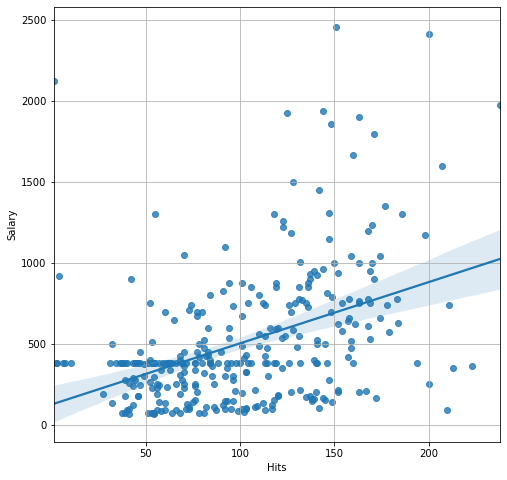

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#TODO -> DONE
fig,ax = plt.subplots(figsize=(8,8))
sns.set_theme(color_codes=True)
ax = sns.regplot(x='Hits', y='Salary',data=train)
ax.grid(True)

<h3> Q.3. Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.
</h3>

In [6]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = train[['Hits']]
y = train[['Salary']]

# TODO: Split the data into 70/30 train/test datasets -> DONE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# TODO: Fit linear regression model
lin_reg = LinearRegression().fit(X_train,y_train)

# TODO: print the slope and intercept
print(f'Coefficients: {round(lin_reg.coef_[0][0],4)}')
print(f'Intercept: {round(lin_reg.intercept_[0],4)}')
print('\n')

# Stats Model
X_train_sm = sm.add_constant(X_train)
statsModels = sm.OLS(y_train, X_train_sm).fit()
print(statsModels.summary())

Coefficients: 3.7443
Intercept: 111.3982


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     60.53
Date:                Tue, 01 Dec 2020   Prob (F-statistic):           2.67e-13
Time:                        16:05:49   Log-Likelihood:                -1627.8
No. Observations:                 225   AIC:                             3260.
Df Residuals:                     223   BIC:                             3267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

<h3> Q.4. Compute the RMSE of the model obtained above</h3>

In [7]:
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt

#TODO -> DONE
y_pred = lin_reg.predict(X_test)
score = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Linear Regression RMSE: {score}')
scores = pd.DataFrame(
    index=[f'Linear Regression'],
    columns=['RMSE'],
    data = [score]
)

Linear Regression RMSE: 446.6775


<h3> Q.5. Graph the linear regression model obtained on the data</h3>

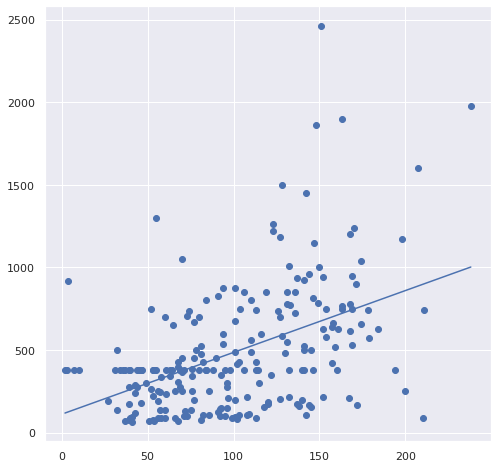

In [8]:
# TODO: Plot outputs
fig,ax = plt.subplots(figsize=(8,8))
x = np.linspace(X_train.min(),X_train.max(),1000)
#y = lin_reg.coef_[0][0]*x + lin_reg.intercept_[0]
ax.scatter(X_train,y_train)
ax.plot(x,lin_reg.predict(x))
ax.grid(True)
plt.show();

<h3> Q.6. Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.
</h3>

In [9]:
import numpy as np

# Generate weights for polynomial function with degree 2
# TODO -> DONE
weights = np.polyfit(X_train[X_train.columns[0]].values, y_train[y_train.columns[0]].values, 2)

# Generate model with the given weights
# TODO -> DONE
poly_model = np.poly1d(weights)

# Prediction on test set
# TODO -> DONE
y_pred = poly_model(X_test)

# TODO: Compute the RMSE
score = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Polynomial Regression RMSE: {score}')
df = pd.DataFrame(
    index=[f'Polynomial Regression'],
    columns=['RMSE'],
    data = [score]
)
scores = pd.concat([scores,df])

Polynomial Regression RMSE: 436.3859


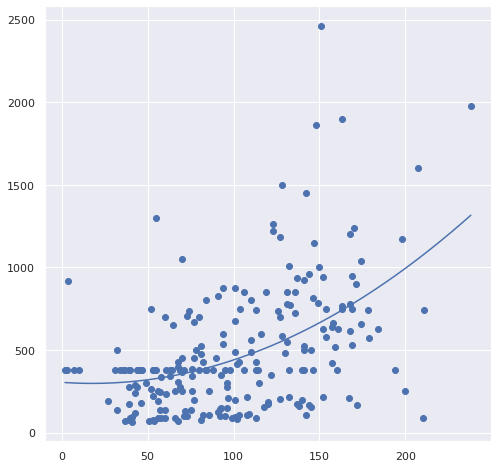

In [10]:
# TODO: Plot the visualisation
fig,ax = plt.subplots(figsize=(8,8))

x = np.linspace(X_train.min(),X_train.max(),1000)
ax.scatter(X_train,y_train)
ax.plot(x,poly_model(x))
ax.grid(True)
plt.show();

<h3> Q.7. Create a cubic spline with 3 knots at 40, 100 and 150</h3>

In [11]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 40, 100 and 150
#TODO -> DONE
transformed_x = dmatrix("bs(train, knots=(40,100,150), degree=3, include_intercept=False)", {"train": X_train},return_type='dataframe')

# Fit a generalized linear models on the transformed dataset
#TODO -> DONE
fit_glm = sm.GLM(y_train, transformed_x).fit()

# Prediction
#TODO -> DONE
pred_glm = fit_glm.predict(dmatrix("bs(valid, knots=(40,100,150), include_intercept=False)", {"valid": X_test}, return_type='dataframe'))

# TODO: Compute the RMSE
score = round(np.sqrt(mean_squared_error(y_test, pred_glm)),4)
print(f'Cubic Spine RMSE: {score}')
df = pd.DataFrame(
    index=[f'Cubic Spine'],
    columns=['RMSE'],
    data = [score]
)
scores = pd.concat([scores,df])

Cubic Spine RMSE: 459.223


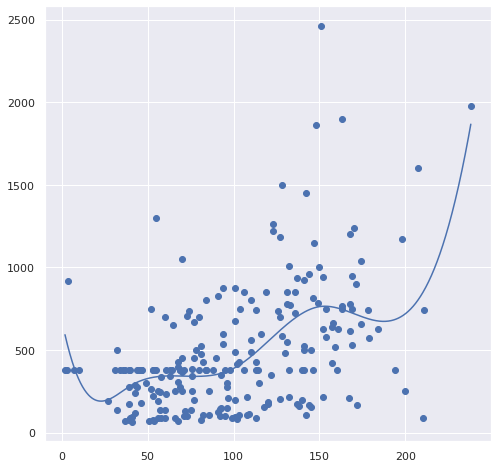

In [12]:
# TODO: Plot the visualisation
fig,ax = plt.subplots(figsize=(8,8))

x = np.linspace(X_train.min(),X_train.max(),1000)
y = fit_glm.predict(dmatrix("bs(valid, knots=(40,100,150), include_intercept=False)", {"valid": x}, return_type='dataframe'))
ax.scatter(X_train,y_train)
ax.plot(x,y)
ax.grid(True)
plt.show();

<h3> Q.8. Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'</h3>

In [13]:
# Generate natural cubic spline
# TODO -> DONE
transformed_x = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit_glm = sm.GLM(y_train, transformed_x).fit()

# TODO: Predict -> DONE
pred_glm = fit_glm.predict(dmatrix("cr(valid, df=3)", {"valid": X_test}, return_type='dataframe'))
score = round(np.sqrt(mean_squared_error(y_test, pred_glm)),4)

# TODO: Compute the RMSE
score = round(np.sqrt(mean_squared_error(y_test, pred_glm)),4)
print(f'Natural Spine RMSE: {score}')
df = pd.DataFrame(
    index=[f'Natural Spine'],
    columns=['RMSE'],
    data = [score]
)
scores = pd.concat([scores,df])

Natural Spine RMSE: 434.6969


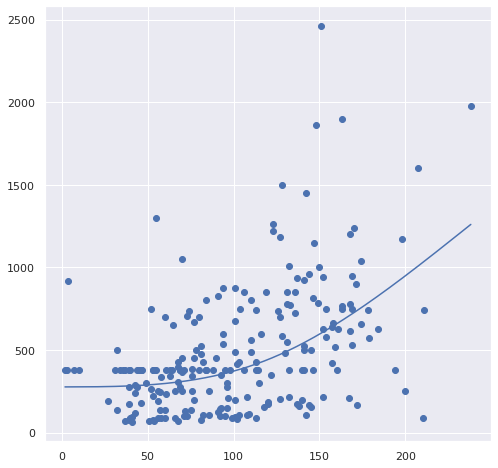

In [14]:
# Visualization
fig,ax = plt.subplots(figsize=(8,8))

x = np.linspace(X_train.min(),X_train.max(),1000)
y = fit_glm.predict(dmatrix("cr(valid, df=3)", {"valid": x}, return_type='dataframe'))
ax.scatter(X_train,y_train)
ax.plot(x,y)
ax.grid(True)
plt.show();

<h3> Q.9. Which model performed the best?</h3>

In [15]:
scores.sort_values('RMSE')

,RMSE
Natural Spine,434.6969
Polynomial Regression,436.3859
Linear Regression,446.6775
Cubic Spine,459.2230


In [16]:
# Natural spine performed the best. Polynomial regression also had very close scores.
# Note, forcing the polynomial to knots is only valuable if some insight is known about the dataset.

<h3><h3> Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [17]:
# Enter summary here
# I have only used numpy's polynomial regression to tackle non-linearity. 
# I learned that splines are piecewise polynomial functions.
# I will add this to my toolkit. It is important to note that most datasets 
#     don't behave in predictable polynomial functions but it gives a good baseline.